# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [2]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Library for splitting and preparing the data
from sklearn.model_selection import train_test_split

# Libaries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To remove the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# To set the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
boston_housing_data = pd.read_csv("/content/drive/MyDrive/MIT_course_elective_project/Boston.csv")

In [6]:
# Copying data to another variable to avoid any changes to original data
data = boston_housing_data.copy()

## Data Overview

- Observations
- Sanity checks

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Observations** The DataFrame has 13 columns as mentioned in the Data Dictionary. Data in each row corresponds to a house in Boston sururb or town.

In [8]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


### **Shape of the data**

In [9]:
print(f"In the data given for Boston housing, there are {data.shape[0]} rows and {data.shape[1]} columns")

In the data given for Boston housing, there are 506 rows and 13 columns


## **Check the data types in columns**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations**

Each column contains 506 non-null observations, indicating that there are no missing values in the dataset. The dataset consists of 13 columns, all of which are numeric.

## **Check for missing values in the dataset**

In [11]:
data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


**Observations**

There are NO MISSING VALUES in the dataset!

## **Check for duplicate data**


In [12]:
data.duplicated().sum()

0

**Observations**

There are NO DUPLICATE VALUES in the dataset!

## **Number of unique data points**

In [13]:
data.nunique()


,0
CRIM,504
ZN,26
INDUS,76
CHAS,2
NOX,81
RM,446
AGE,356
DIS,412
RAD,9
TAX,66


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

**Statistical summary of the data**

In [14]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### **Observations**

* CRIM (Per capita crime rate by town): About 75% of crime rates range between approximately 0 and 4, with a maximum value of 88, indicating a potential outlier.

* ZN (Proportion of residential land zoned for lots over 25,000 sq.ft.): Over half of the properties have 0% of their land zoned for large lots, with the maximum being 100%, suggesting that such zoning is relatively rare.

* INDUS (Proportion of non-retail business acres per town): The proportion of non-retail business land varies from 0.4% to 27%, with an average of 11%, indicating that most towns have some industrial presence.

* CHAS (Charles River dummy variable): With a mean of 0.069, about 7% of homes are located along the Charles River.

* NOX (Nitric Oxide concentration in parts per 10 million): The NOX levels range from 0.38 to 0.87, with an average concentration of 0.55. The distribution appears fairly uniform.

* RM (Average number of rooms per dwelling): The number of rooms ranges from 3.5 to 8.7, with an average of 6.2. The distribution is fairly typical.

* AGE (Proportion of owner-occupied units built before 1940): The age of homes varies from 2.9 years to 100 years, with an average of 68 years. The distribution is typical, with the minimum age indicating no newly constructed homes in the dataset.

* DIS (Weighted distances to five Boston employment centers): Distances range from 1.1 to 12.1, with an average of 3.7. The distribution is fairly consistent.

* RAD (Index of accessibility to radial highways): Accessibility ranges from 1 to 24, with more than 75% of homes at the maximum value of 24. A significant gap between the 50th percentile (5) and the 75th percentile (24) suggests two categories of homes: those in rural areas and those in more urban settings.

* TAX (Full-value property-tax rate per $10,000): Property tax rates vary from 187 to 711, with an average of 408. This range suggests that the homes are generally mid- to high-income.

* PTRATIO (Pupil-teacher ratio by town): Pupil-teacher ratios range from 12.6 to 22, with an average of 18.4. The distribution is typical.

* LSTAT (% lower status of the population): The percentage of lower socio-economic status residents ranges from 7% to 37.9%, with an average of 12%. Most areas have a relatively low percentage of lower-status populations, though a jump from the 75th percentile (16.9%) to the maximum (37.9%) could indicate pockets of lower socio-economic regions or potential outliers.

* MEDV (Median value of owner-occupied homes in 1,000 USD): The median home value ranges from 5,000 USD to 50,000 USD, with an average of 22,000 USD. The distribution is relatively standard.

## **Univariate analysis**

In [15]:
def histogram_boxplot(data, feature, figsize=(11,7), kde=True, bins=None):
    """
    Boxplot and histogram

    Args:
        data: Dataframe.
        feature: Dataframe column.
        figsize: Size of figure.
        kde: Whether or not to show density curve (default False).
        bins: Number of bins for the histogram plot (default None).
    """

    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,      # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )                   # Creating the 2 subplots

    # Boxplot with a lighter color using boxprops
    sns.boxplot(
        data=data, x=feature, ax=ax_box, showmeans=True,
        boxprops=dict(facecolor="hotpink", alpha=0.5)
    )

    # Histogram with a different color palette
    if bins:
      sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist, bins=bins, palette="dodgerblue"
    )
    else:
      sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist, color="turquoise"
    )

    # Mean and median lines with contrasting colors
    ax_hist.axvline(
        data[feature].mean(), color="orange", linestyle="--"
    )
    ax_hist.axvline(
        data[feature].median(), color="purple", linestyle="-"
    )


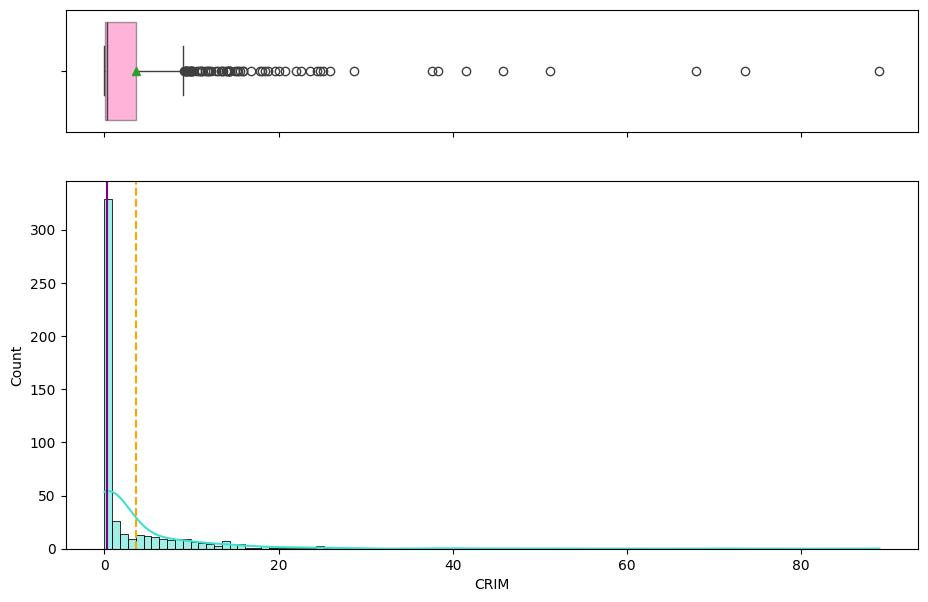

In [16]:
histogram_boxplot(data, "CRIM")

**Observations**

* The "CRIM" feature has a right-skewed distribution, meaning there are a few high values that pull the tail to the right.
* There are several outliers present in the data.
* The median "CRIM" value is relatively low (close to zero), but the maximum value is quite high.



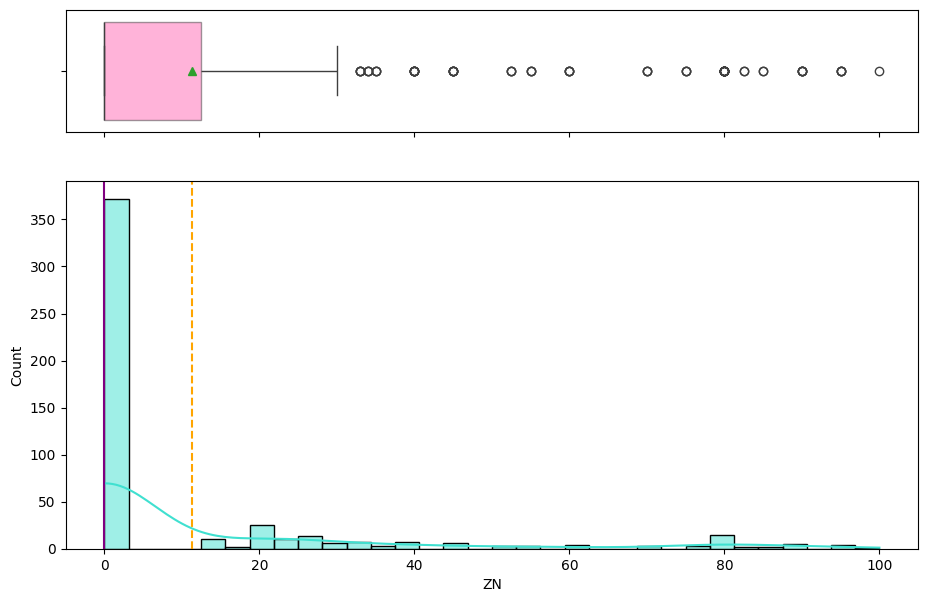

In [17]:
histogram_boxplot(data, "ZN")

**Observations**

* The "ZN" feature has a right-skewed distribution, meaning there are a few high values that pull the tail to the right.

* There are several outliers present in the data.

* The median "ZN" value is relatively low (close to zero), but the maximum value is quite high.



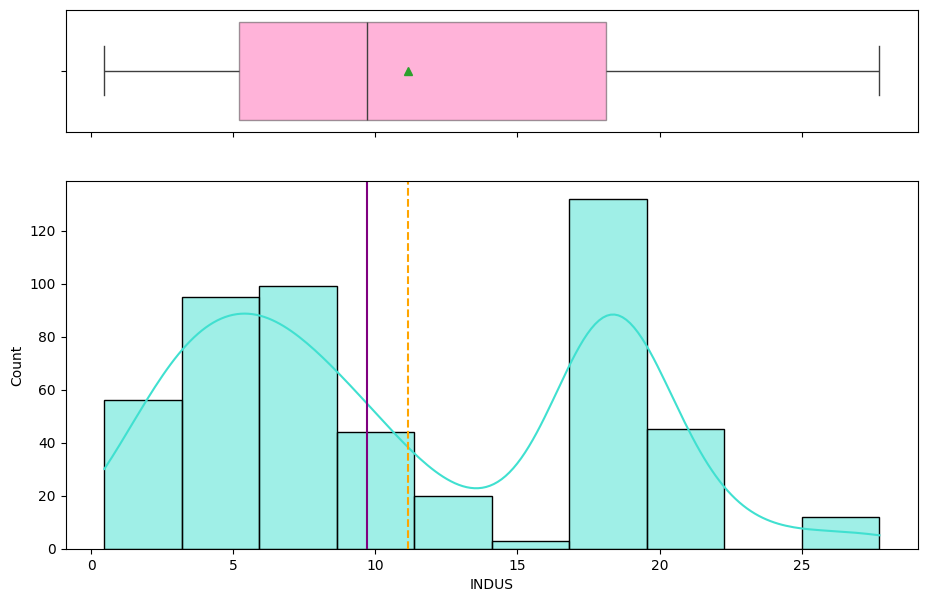

In [18]:
histogram_boxplot(data, "INDUS")

**Observations**

* The distribution in the histogram is somewhat bimodal, with peaks around 5 and 20. There is also a density curve overlaid in cyan, showing the estimated distribution.

* This shows that most towns have either a low (around 5) or high (around 20) proportion of non-retail business acres, with a few outliers.


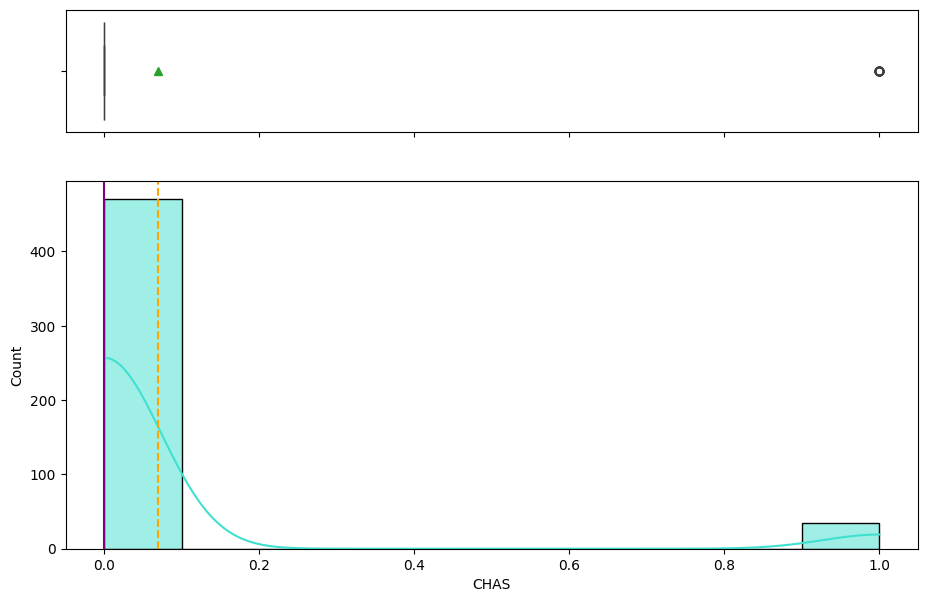

In [19]:
histogram_boxplot(data, "CHAS")

**Observations**

* "CHAS" feature is highly skewed to the right, with a large number of observations at the value 0 and a small number of observations at the value 1.

* The median "CHAS" value is 0, indicating that most houses do not border the river.


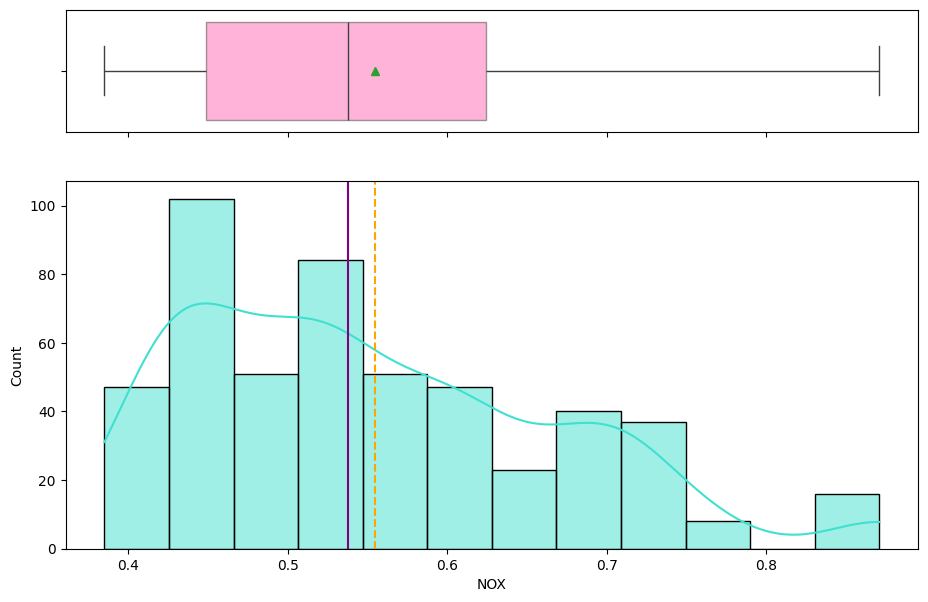

In [20]:
histogram_boxplot(data=data,feature="NOX")

**Observations**

 Most towns have NOX concentrations between 0.4 and 0.6, with a declining number of towns at higher concentrations. There is one notable outlier on the high end.

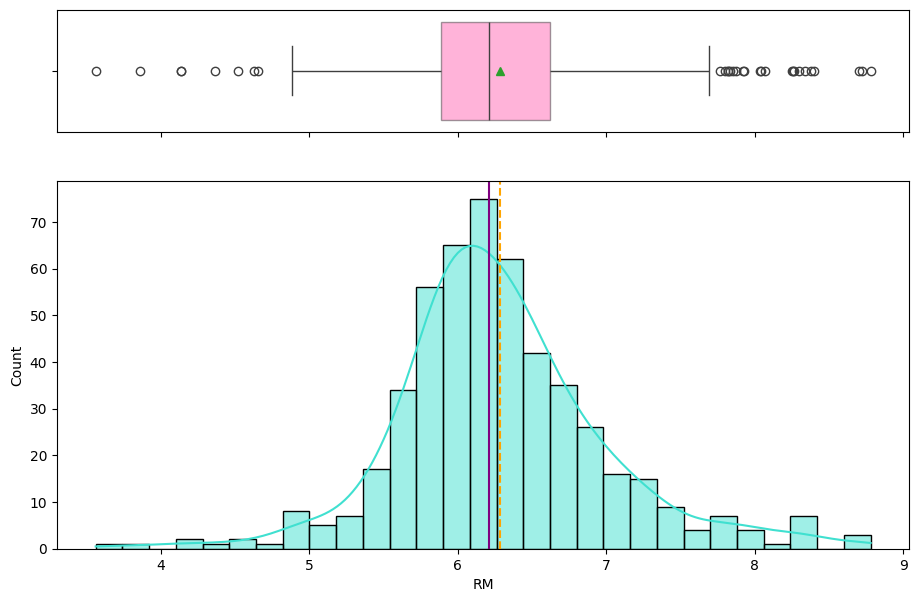

In [21]:
histogram_boxplot(data=data, feature="RM")

**Observations**

Most homes have around 6 rooms, with some outliers at both the lower and higher ends of the room count spectrum. The data distribution is slightly skewed to the right.



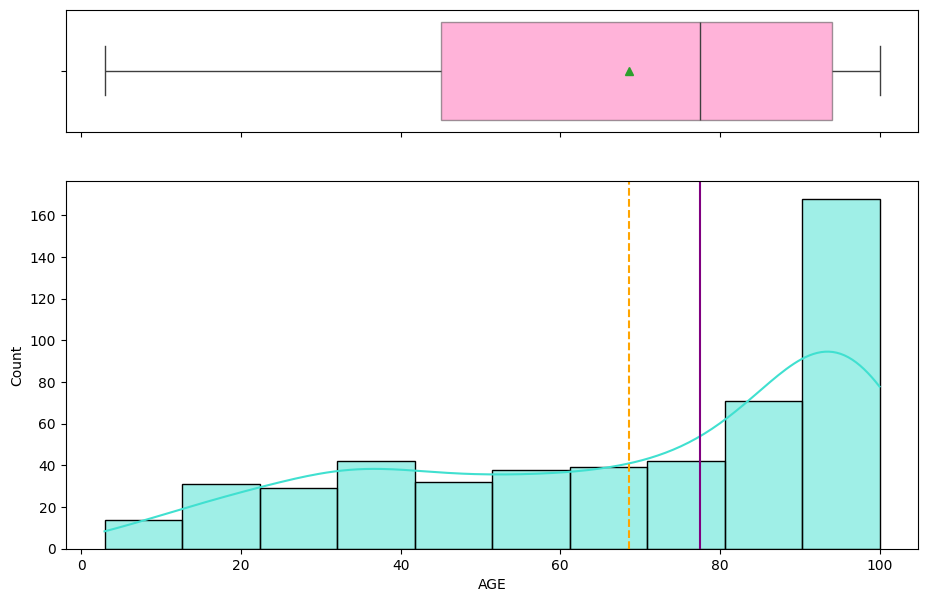

In [22]:
histogram_boxplot(data=data,feature="AGE")

**Observations**

The histogram is heavily left skwed. Thus, most homes in the dataset were built quite a long time ago, with the majority of them being older than 70 years.


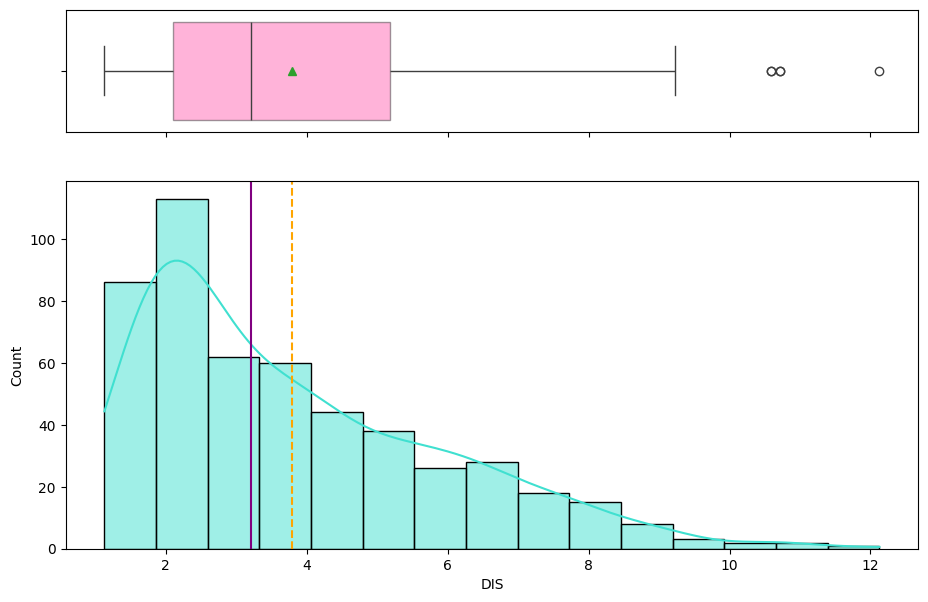

In [23]:
histogram_boxplot(data=data,feature="DIS")

**Observations**

Most homes are relatively close to employment centers (concentrated between 1 and 4), with a few located at greater distances, leading to a right-skewed distribution.


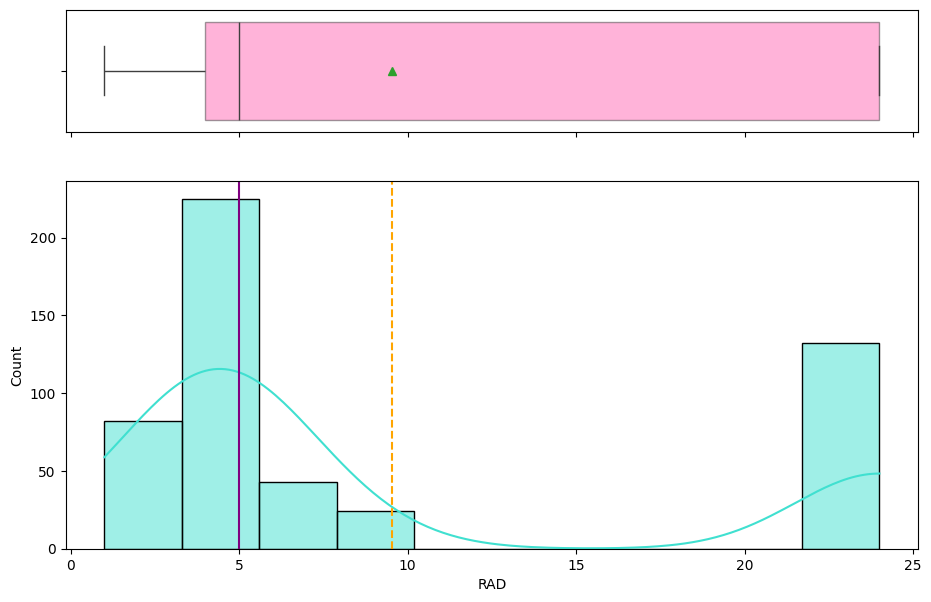

In [24]:
histogram_boxplot(data=data,feature="RAD")

**Observations**

The "RAD" variable has a bimodal distribution, with most homes having moderate accessibility to highways, while a smaller group has very high accessibility (near 24).

So, there might be two categories of homes, rural and urban.

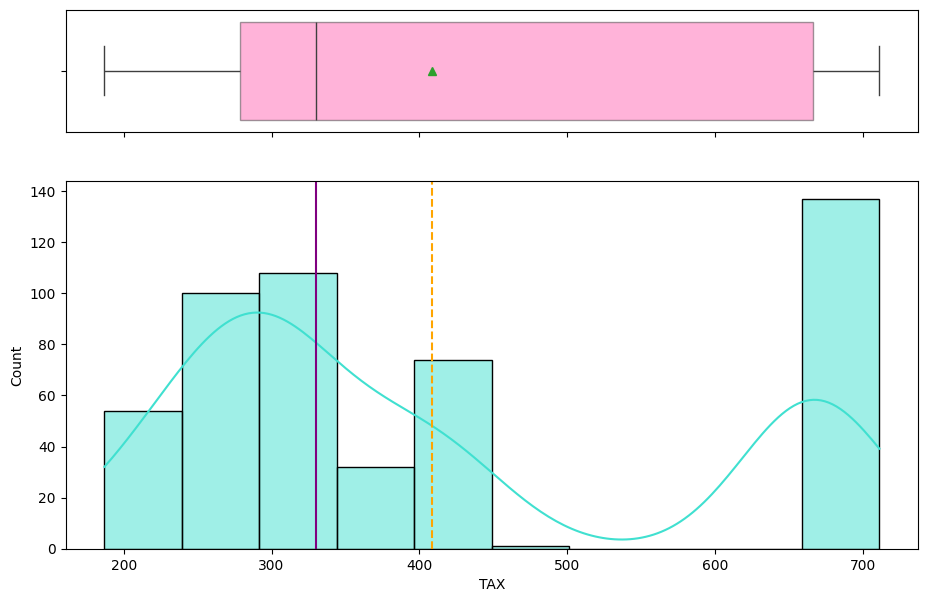

In [25]:
histogram_boxplot(data=data,feature="TAX")

**Observations**

The histogram distribtuion looks similar to RAD of two cathegories of houses (rural and urban), a bimodal distribution.


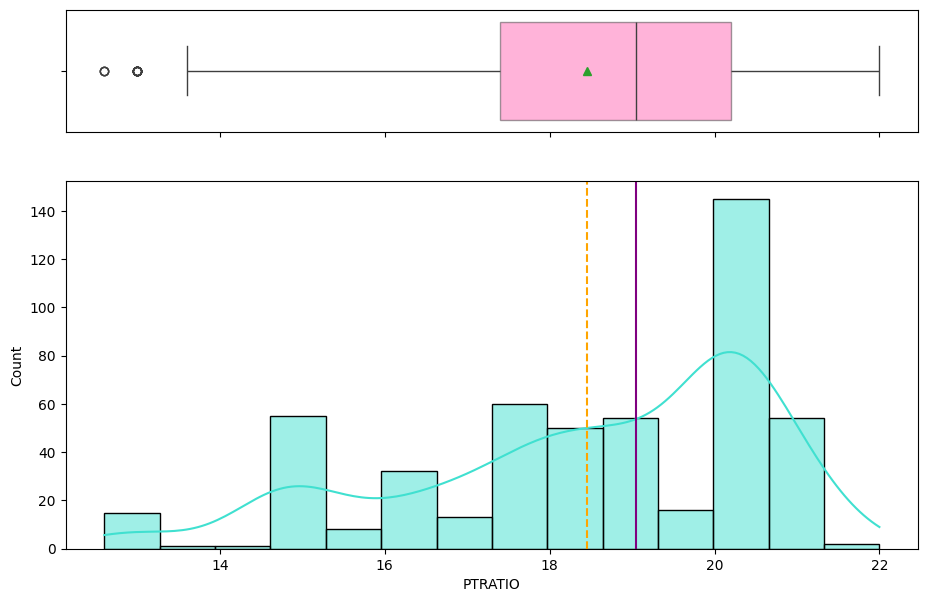

In [26]:
histogram_boxplot(data=data,feature="PTRATIO")

**Observations**

The "PTRATIO" feature has a left-skewed distribution with a few outliers. This suggests that there might be a concentration of data points on the higher end of the scale, with a smaller number of observations on the lower end.



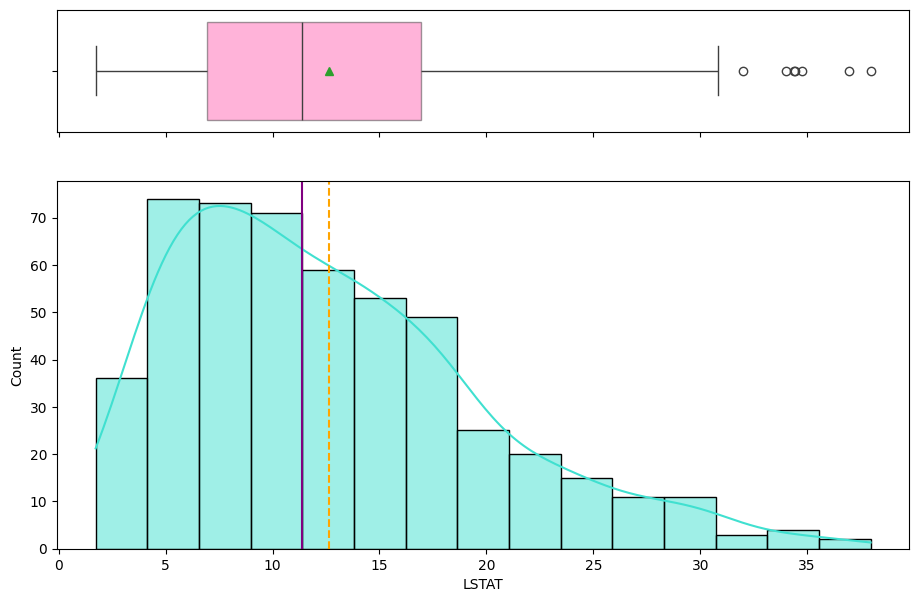

In [27]:
histogram_boxplot(data=data,feature="LSTAT")


**Observations**

* The "LSTAT" feature has a right-skewed distribution, meaning there are a few high values that pull the tail to the right. Right-skewed suggesting there are fewer overall lower socio-economic people.
* There are a few outliers present. The median "LSTAT" value is relatively low, but the maximum value is quite high.



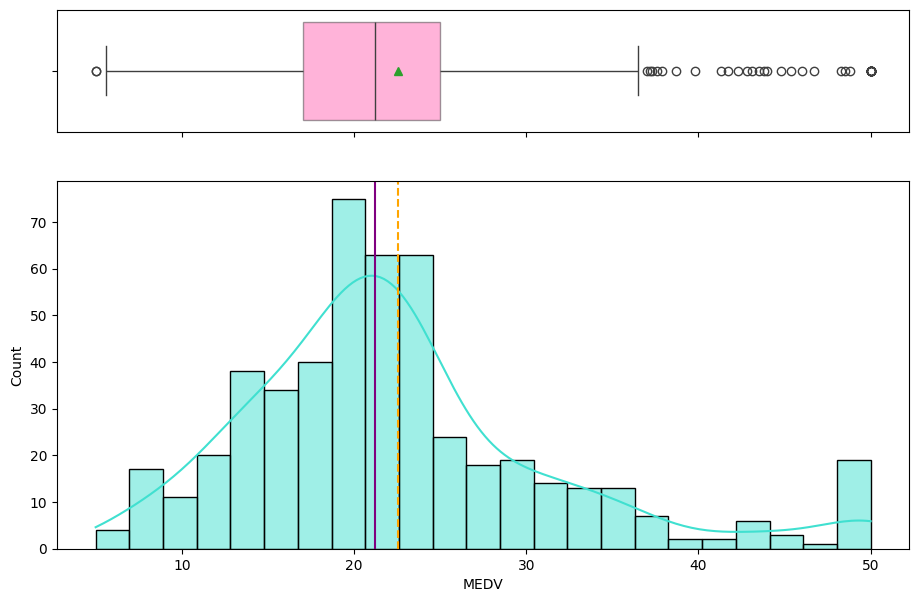

In [28]:
histogram_boxplot(data=data,feature="MEDV")

## **Observations**

Dependent variable MEDV is slightly left skewed and does not resemble a normal distribution.

Least squares regression models assume that *residuals are normally distributed*. A non-normal dependent variable will result in non-normal residual errors. Since the dependent variable is slightly skewed, we need to apply a **log transformation to the MEDV column** and examine the distribution of the transformed data.

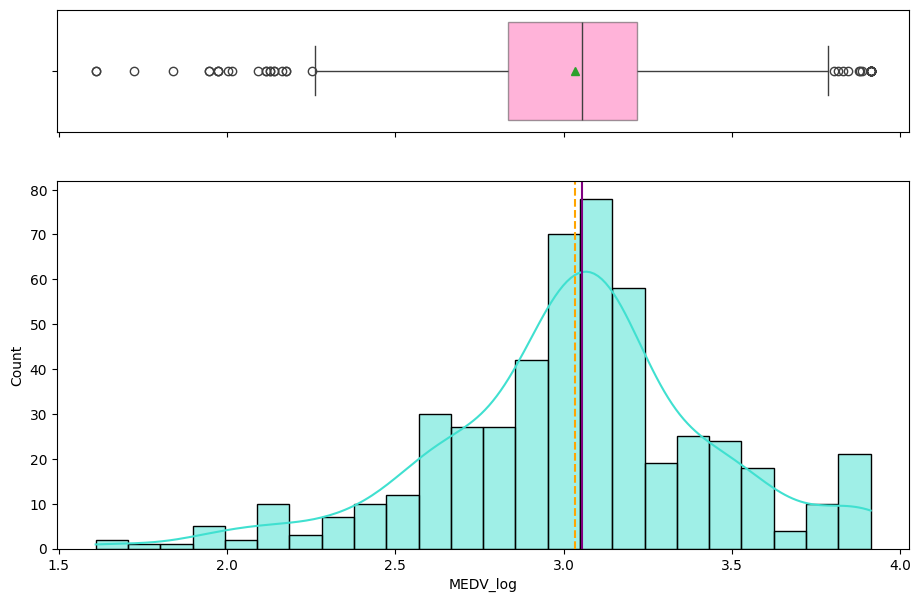

In [29]:
data['MEDV_log'] = np.log(data['MEDV'])

histogram_boxplot(data=data,feature="MEDV_log")


**Observations**

The **log-transformation (MEDV_log) seem to have a nearly normal distribution**, therefore we will proceed with log(MEDV).



##**Multi-variate analysis**



**Heatmap**

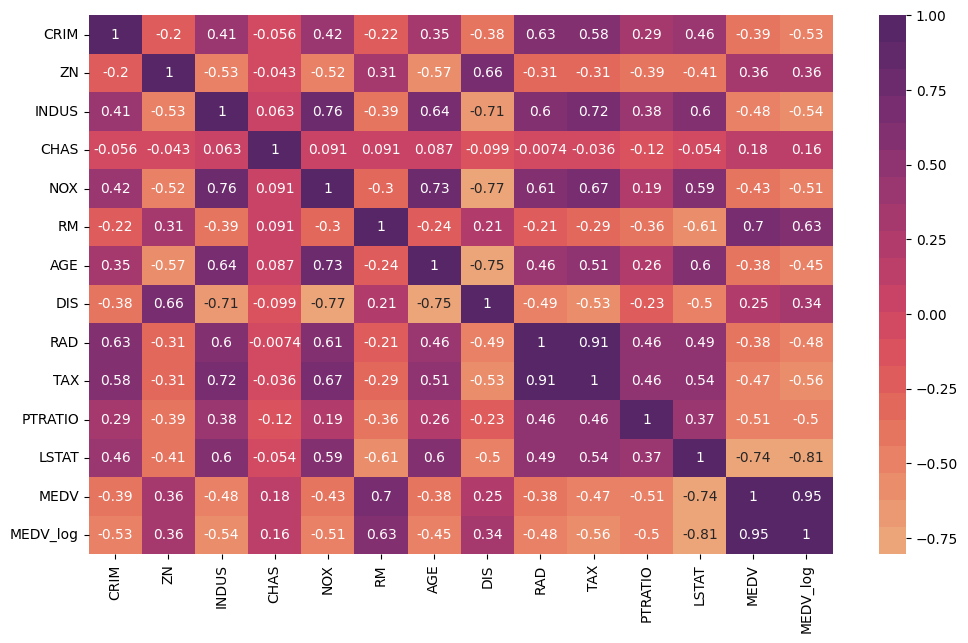

In [30]:
# Plot the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(data=data.corr(), annot=True, cmap=sns.color_palette("flare", 20))
plt.show()

### **Filter correlations greater than or equal to 0.7 or less than or equal to -0.7**

In [31]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Filter correlations greater than or equal to 0.7 or less than or equal to -0.7
high_corr = corr_matrix[(corr_matrix >= 0.7) | (corr_matrix <= -0.7)]

# Remove self-correlations (correlations of a variable with itself, which are always 1)
high_corr = high_corr[high_corr != 1]

# Display the result
print(high_corr)

          CRIM  ZN     INDUS  CHAS       NOX  RM       AGE       DIS  \
CRIM       NaN NaN       NaN   NaN       NaN NaN       NaN       NaN   
ZN         NaN NaN       NaN   NaN       NaN NaN       NaN       NaN   
INDUS      NaN NaN       NaN   NaN  0.763651 NaN       NaN -0.708027   
CHAS       NaN NaN       NaN   NaN       NaN NaN       NaN       NaN   
NOX        NaN NaN  0.763651   NaN       NaN NaN  0.731470 -0.769230   
RM         NaN NaN       NaN   NaN       NaN NaN       NaN       NaN   
AGE        NaN NaN       NaN   NaN  0.731470 NaN       NaN -0.747881   
DIS        NaN NaN -0.708027   NaN -0.769230 NaN -0.747881       NaN   
RAD        NaN NaN       NaN   NaN       NaN NaN       NaN       NaN   
TAX        NaN NaN  0.720760   NaN       NaN NaN       NaN       NaN   
PTRATIO    NaN NaN       NaN   NaN       NaN NaN       NaN       NaN   
LSTAT      NaN NaN       NaN   NaN       NaN NaN       NaN       NaN   
MEDV       NaN NaN       NaN   NaN       NaN NaN       NaN      

## **Observations**

**If we focus on the relation with depedent variable MEDV:**

1) RM has the highest positive correlation and LSTAT has the highest negative correlation.

2) PTRATIO, TAX, NOX, INDUS also has a negative correlation (great than 0.4) with MEDV. So, these are good indicators of using them as predictor parameters.



**Other strong correlations (>= 0.7 or <= -0.7) not involving the dependent variable MEDV:**

1) TAX and RAD are highly correlated (0.91), so may be one of them should be discarded.

2) A positive correlation between NOX and INDUS (0.76), indicating industrial areas will produce more Nitric Oxide.

3) A positive correlation between NOX and AGE (0.73), probably indicating older areas are more industrialized.

4) A negative correlation between NOX and DIS (-0.77), indicating  Nitric Oxide is emitted closer to industrial areas.

5) A positive correlation between INDUS and TAX (0.72), indicating industrial area pay higher taxes.

6) A negative correlation between INDUS and DIS (-0.71), indicating industrial areas are mostly located in the 5 Boston employment areas.

7) A negative correlation between AGE and DIS (-0.75), indicating industrial areas are mostly older.




## **Visualizing the relationships between the features having significant correlations (>= 0.7 or <= -0.7) by making plots**


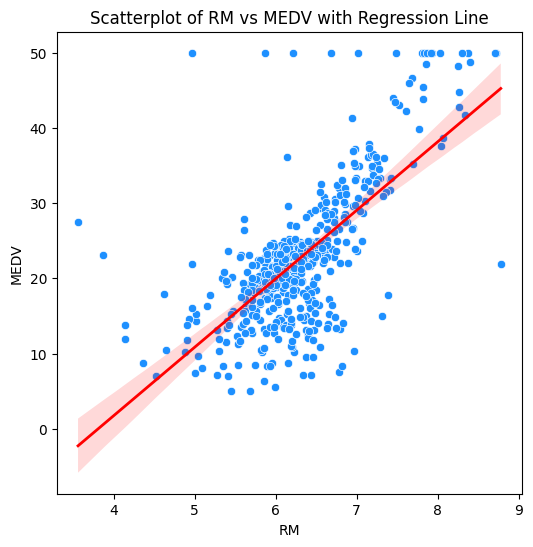

In [32]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize=(6, 6))
sns.scatterplot(x='RM', y='MEDV', data=data, color='dodgerblue', marker='o')
sns.regplot(x='RM', y='MEDV', data=data, scatter=False, color='red', line_kws={"linewidth": 2})

# Show the plot
plt.title('Scatterplot of RM vs MEDV with Regression Line')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

**Observations**

House prices appear to rise with an increase in RM values, which is anticipated since homes with more rooms typically cost more.

There are several outliers aligned horizontally, indicating that the MEDV value is capped at 50.


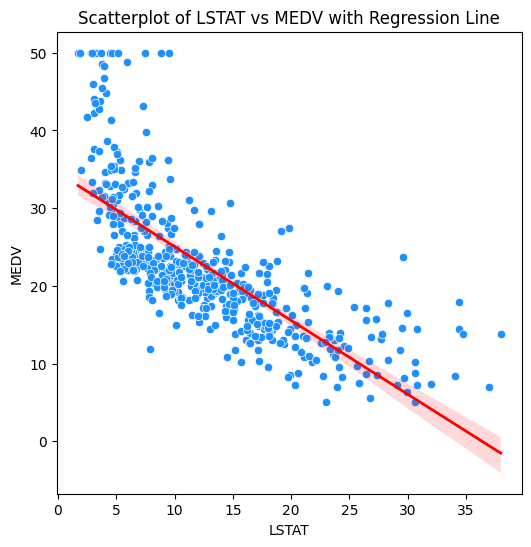

In [33]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize=(6, 6))
sns.scatterplot(x='LSTAT', y='MEDV', data=data, color='dodgerblue', marker='o')
sns.regplot(x='LSTAT', y='MEDV', data=data, scatter=False, color='red', line_kws={"linewidth": 2})

# Show the plot
plt.title('Scatterplot of LSTAT vs MEDV with Regression Line')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

**Observations**

House prices tend to decline as LSTAT increases, which is plausible since properties in lower-status areas generally have lower prices.

There are a few outliers, and as seen before, the data appears to be capped at 50.

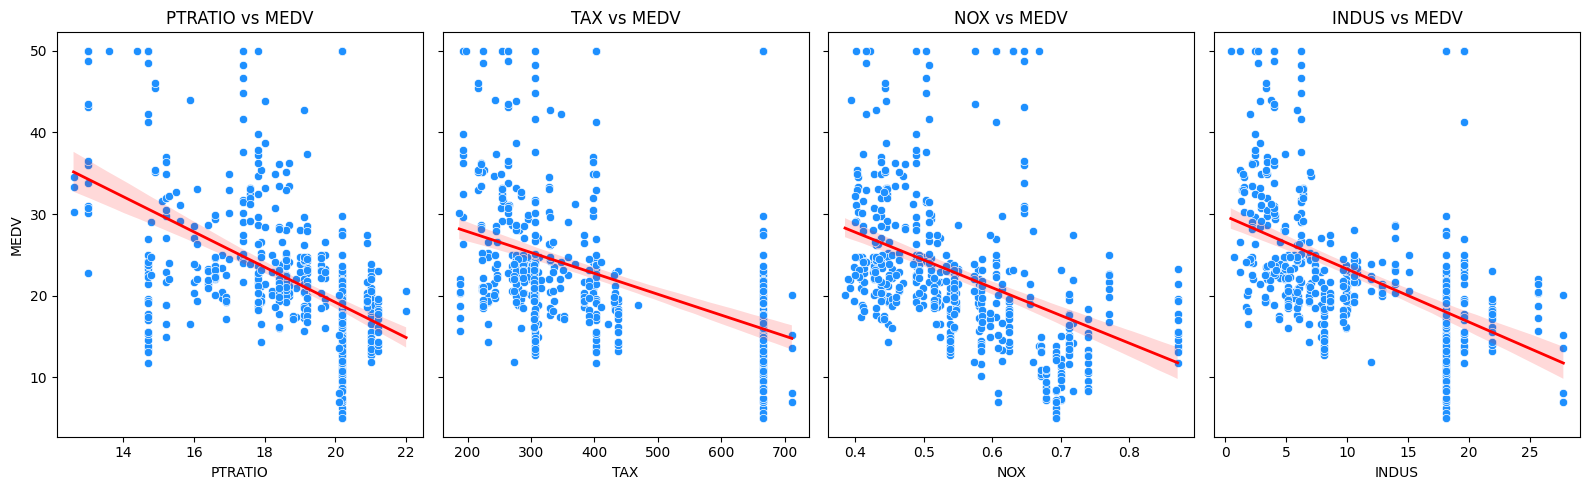

In [34]:
# List of predictor variables
features = ['PTRATIO', 'TAX', 'NOX', 'INDUS']

# Set up the figure and axes for 4 subplots (1 row, 4 columns)
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=True)

# Loop over each predictor and create a scatter plot
for i, feature in enumerate(features):
    sns.scatterplot(x=data[feature], y=data['MEDV'], ax=axes[i], color='dodgerblue')
    sns.regplot(x=data[feature], y=data['MEDV'], ax=axes[i], scatter=False, color='red', line_kws={"linewidth": 2})
    axes[i].set_title(f'{feature} vs MEDV')
    axes[i].set_xlabel(feature)

# Set the common y-label
axes[0].set_ylabel('MEDV')

# Display the plot
plt.tight_layout()
plt.show()


**Observations**

The relationships between the four variables and MEDV are generally negative, suggesting that as each of these features increases (e.g., more industrialized areas, higher pollution, higher taxes, higher pupil teacher ratio ), house prices tend to decrease.

However, the data is quite scattered in each plot, indicating that while there is some correlation, it is not strong. There might be some other factors influencing MEDV that are not captured by these variables alone.

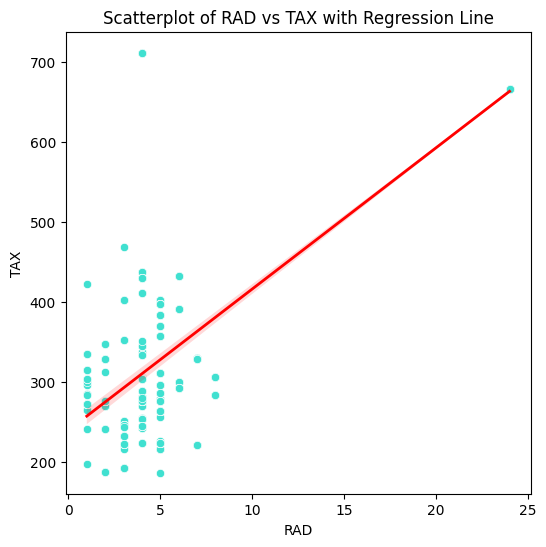

In [35]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize=(6, 6))
sns.scatterplot(x='RAD', y='TAX', data=data, color='turquoise', marker='o')
sns.regplot(x='RAD', y='TAX', data=data, scatter=False, color='red', line_kws={"linewidth": 2})

# Show the plot
plt.title('Scatterplot of RAD vs TAX with Regression Line')
plt.xlabel('RAD')
plt.ylabel('TAX')
plt.show()

**Observations**

Although the correlation between RAD and TAX is very high, no clear trend is observable between these two variables.

So, this trend may be due to the two outlier points in the plot with high TAX values.

In [36]:
# Remove the data corresponding to high tax rate
data_modified = data[data['TAX'] < 550]

# Calculate the correlation between RAD and TAX in the modified data
correlation = data_modified['RAD'].corr(data_modified['TAX'])

print(f"After removing the two outlier points, the correlation between RAD and TAX is {correlation:.2f}")

After removing the two outlier points, the correlation between RAD and TAX is 0.25


**Observations** So, indeed the aparent relation between TAX and RAD was due to the two outlier points, without those points, there is no obsevious correlation.

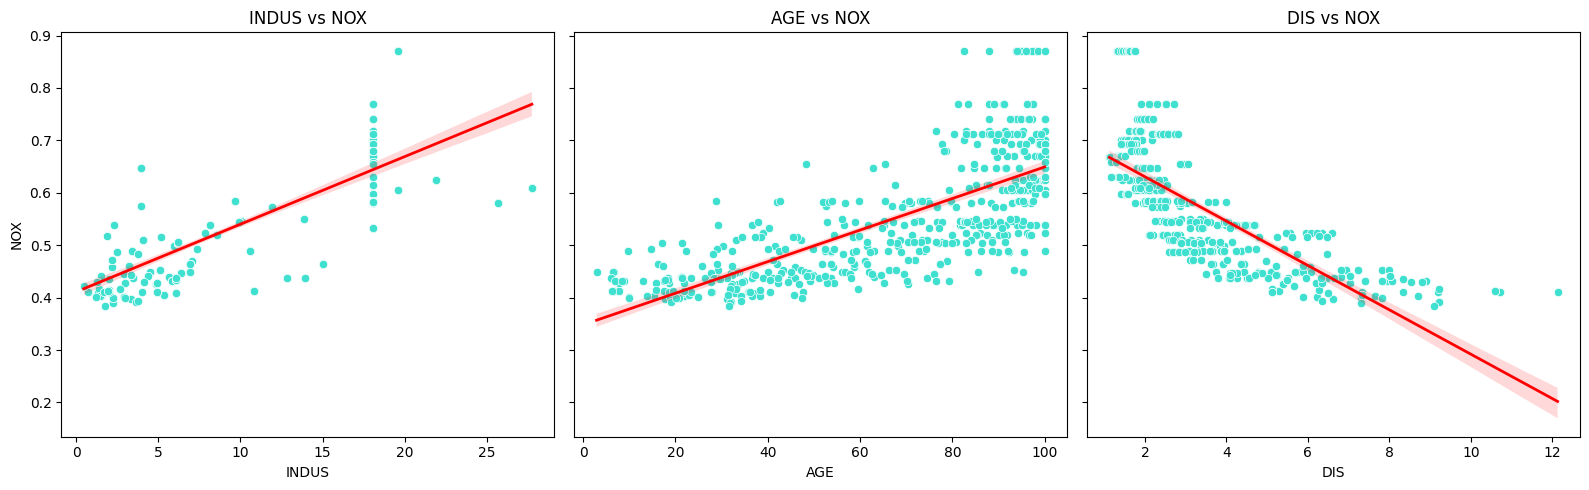

In [37]:
# List of predictor variables
features = ['INDUS','AGE', 'DIS']

# Set up the figure and axes for 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)

# Loop over each predictor and create a scatter plot
for i, feature in enumerate(features):
    sns.scatterplot(x=data[feature], y=data['NOX'], ax=axes[i], color='turquoise')
    sns.regplot(x=data[feature], y=data['NOX'], ax=axes[i], scatter=False, color='red', line_kws={"linewidth": 2})
    axes[i].set_title(f'{feature} vs NOX')
    axes[i].set_xlabel(feature)

# Set the common y-label
axes[0].set_ylabel('NOX')

# Display the plot
plt.tight_layout()
plt.show()

**Observations**

The plots suggest that INDUS, AGE, and DIS (negative) have a linear relationships with NOX.

*   Nitric Oxide (NOX) seem to increase with industrial areas (INDUS), with no obvious outliers present.
*   Nitric Oxide (NOX) seem to increase with age of the house (AGE), further supporting the possibility that older houses are located in more industrial areas.
* Nitric Oxide (NOX) levels decrease with increasing distance from the employment centers (DIS), suggesting that these centers are the industrialized areas of Boston, distant regions from the centers have lower Nitric Oxide content in air.





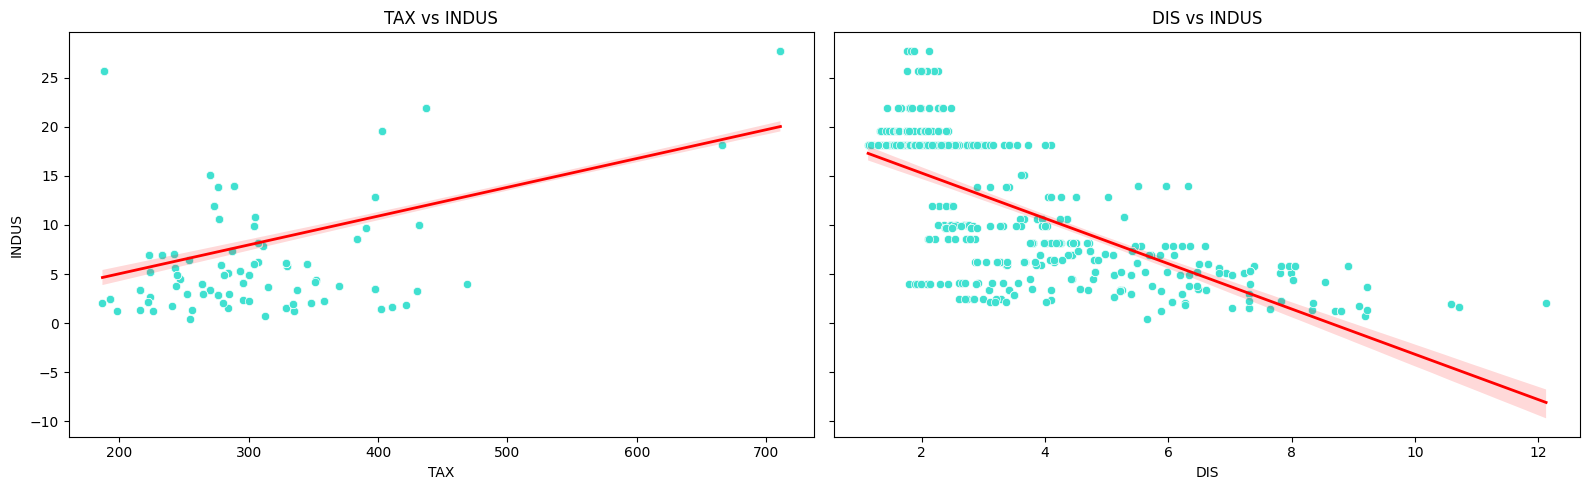

In [38]:
# List of predictor variables
features = ['TAX', 'DIS']

# Set up the figure and axes for 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# Loop over each predictor and create a scatter plot
for i, feature in enumerate(features):
    sns.scatterplot(x=data[feature], y=data['INDUS'], ax=axes[i], color='turquoise')
    sns.regplot(x=data[feature], y=data['INDUS'], ax=axes[i], scatter=False, color='red', line_kws={"linewidth": 2})
    axes[i].set_title(f'{feature} vs INDUS')
    axes[i].set_xlabel(feature)

# Set the common y-label
axes[0].set_ylabel('INDUS')

# Display the plot
plt.tight_layout()
plt.show()

**Observations**

The plots suggest that both TAX and DIS have linear relationships with INDUS, with TAX having a positive correlation and DIS having a negative correlation.


*   The tax rate (TAX) seems to rise with the proportion of non-retail business acres per town (INDUS). This is likely because these areas use the land for profit-generating activities.
*   The distance from the five Boston employment centers (DIS) seems to increase with a decrease of non-retail business acres per town (INDUS). This means that these employment centers have most of the industries in Boston.



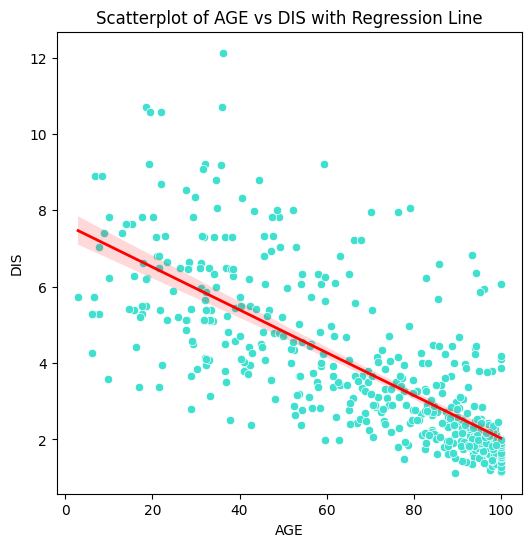

In [39]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize=(6, 6))
sns.scatterplot(x='AGE', y='DIS', data=data, color='turquoise', marker='o')
sns.regplot(x='AGE', y='DIS', data=data, scatter=False, color='red', line_kws={"linewidth": 2})

# Show the plot
plt.title('Scatterplot of AGE vs DIS with Regression Line')
plt.xlabel('AGE')
plt.ylabel('DIS')
plt.show()

**Observations**

The distance of houses to Boston employment centers (DIS) seems to decrease as the proportion of older houses in the town (AGE) increases. This suggests that the employment centers might be situated in well-established towns that were built before 1940.

## **Overall observations from EDA**

The features LSTAT and RM exhibit a linear relationship with the dependent variable MEDV. There are also notable correlations among certain independent variables, which can be *problematic* for a linear regression model.

But, we will move on with splitiing the dataset and make our base model with all the features.

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## **Splitting the model**

In [40]:
# Spliting target variable and independent variables
X = data.drop(['MEDV','MEDV_log'], axis = 1)
y = data['MEDV_log']

#add the intercept term
X = sm.add_constant(X)


In [41]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 1)

## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

## **Multicollinearity check**

** **

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(train):
    vif_data = pd.DataFrame()
    vif_data["feature"] = train.columns
    # Use range(len(train.columns)) to pass the column indices
    vif_data["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    return vif_data

# Assuming X_train is your training data
print(checking_vif(X_train))


    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


**Observations**

* Two variables, RAD and TAX, have high VIF values (greater than 5).

 ### So, we will remove TAX, as it has the highest VIF (>10), and then we will re-evaluate the multicollinearity.



In [43]:
# Create the model after dropping TAX
X_train = X_train.drop(columns = 'TAX')

# Check for VIF
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


**Observations**

Now, we see that the VIF values are below 5 for all independent variables, we can assume that multicollinearity has been effectively addressed.



## Model Building - Linear Regression

In [44]:
# Create the model
model1 = sm.OLS(y_train, X_train).fit()

# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          1.40e-101
Time:                        00:55:58   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.000       4.154       5.111
CRIM          -0.0128      0.002     -7.445      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.425      0.155      -0.000       0.002
INDUS         -0.0004      0.003     -0.148      0.883      -0.006       0.005
CHAS           0.1196      0.039      3.082      0.002       0.043       0.196
NOX           -1.0598      0.187     -5.675      0.000      -1.427      -0.692
RM             0.0532      0.021      2.560      0.011       0.012       0.094
AGE            0.0003      0.001      0.461      0.645      -0.001       0.002
DIS           -0.0503      0.010     -4.894      0.000      -0.071      -0.030
RAD            0.0076      0.002      3.699      0.000       0.004       0.012
PTRATIO       -0.0452      0.007     -6.659      0.000      -0.059      -0.032
LSTAT         -0.0298      0.002    -12.134      0.000      -0.035      -0.025
==============================================================================
Omnibus:                       30.699   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.718
Skew:                           0.372   Prob(JB):                     6.62e-19
Kurtosis:                       5.263   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## **Observations**

**The R-squared value is 76.9%, which is decent but can be improved**.

Next, it is verified if all the regression coefficients are significant i.e. if the coefficients are significantly different from zero.

As we can observe, the coefficients for ZN, AGE, and INDUS are not statistically significant at the alpha=0.05 level. This means these coefficients are not significantly different from zero in the population.

###  **We will drop insignificant variables (variables with p-value > 0.05; ZN, AGE, INDUS) from the above model and will create the regression model again.**

In [45]:
# Create a model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame
Y = data['MEDV_log']

X = data.drop(['MEDV', 'MEDV_log','TAX','ZN','AGE','INDUS'], axis=1)

X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

# Create the model
model2 = sm.OLS(y_train,X_train).fit()

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          2.61e-104
Time:                        00:56:09   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.000       4.174       5.125
CRIM          -0.0125      0.002     -7.349      0.000      -0.016      -0.009
CHAS           0.1198      0.039      3.093      0.002       0.044       0.196
NOX           -1.0562      0.168     -6.296      0.000      -1.386      -0.726
RM             0.0589      0.020      2.928      0.004       0.019       0.098
DIS           -0.0441      0.008     -5.561      0.000      -0.060      -0.028
RAD            0.0078      0.002      3.890      0.000       0.004       0.012
PTRATIO       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
LSTAT         -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Observations**

* Though in this modified second version of the model we observe not much difference in the value of R-squared (76.7%) or adjusted R-squared (76.2%), F-statistic is improved, showing more statistical significance of the model.

* Also, the measured co-efficients are more significant now (since p-value is less than 0.05 for all of them). The sign and magnitude of the coefficients indicate whether these variables increase or decrease house prices (MEDV).





## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied. Those assumptions are below:

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **1. Check for mean residuals**

In [46]:
residuals = model2.resid

np.mean(residuals)

-2.5303049047106675e-15

**Observation**

The mean of residuals is very close to 0. Hence, so the corresponding assumption is satisfied.

### **2. Check for homoscedasticity**


**Homoscedasticity:** When the variance of the residuals is evenly distributed around the regression line, the data is considered homoscedastic.

**Heteroscedasticity:** When the variance of the residuals is uneven across the regression line, the data is considered heteroscedastic. In such cases, the residuals may form patterns like a funnel shape or other non-symmetrical shapes.

To check for homoscedasticity, we will use the Goldfeld-Quandt test.

**Null hypothesis**: Residuals *are homoscedastic*.

**Alternative hypothesis**: Residuals *are heteroscedastic*.

In [47]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train)

lzip(name, test)

[('F statistic', 1.0835082923425292), ('p-value', 0.30190120067668275)]

**Observations**

Since the p-value is greater than 0.05 (0.3 in this case), we cannot reject the null hypothesis that the residuals are homoscedastic. Therefore, the assumption of homoscedasticity is satisfied.

### **3. Linearity of variables**

It indicates that the predictor variables should have a linear relationship with the dependent variable.

To test this assumption, we will plot the residuals against the fitted values. The residuals should not form a distinct pattern and should be randomly and uniformly scattered along the x-axis.

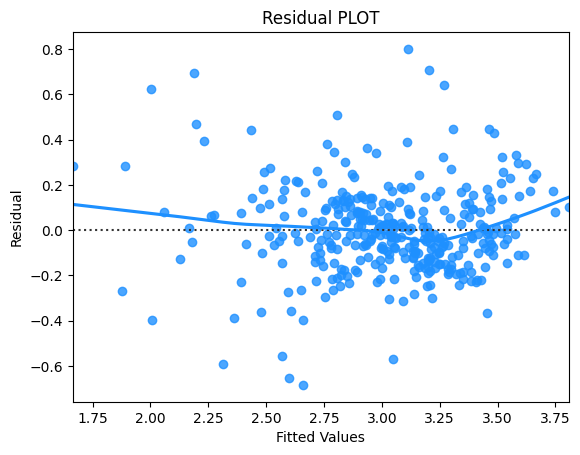

In [48]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "dodgerblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observation:**

There is no clear pattern in the residual vs fitted values plot. Therefore, the corresponding assumption is satisfied.

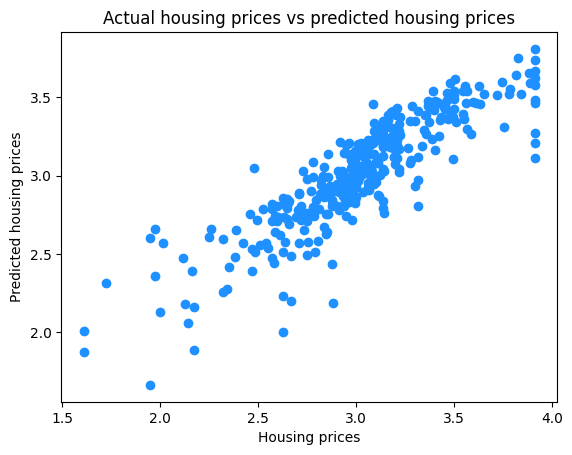

In [49]:
y_pred_train = model2.predict(X_train)

# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred_train, color='dodgerblue')
plt.xlabel("Housing prices")
plt.ylabel("Predicted housing prices")
plt.title("Actual housing prices vs predicted housing prices")
plt.show()

### **4. Normality of error terms**

* Tests for normality focus on the distribution of error terms (residuals) in a regression model, which should ideally follow a normal distribution.

* Non-normality in residuals can lead to unreliable confidence intervals and difficulties in estimating model coefficients through least squares minimization.

* To assess normality, one can visualize the residuals using **histograms** and **QQ plots**, where a straight line indicates normal distribution.


<Axes: ylabel='Count'>

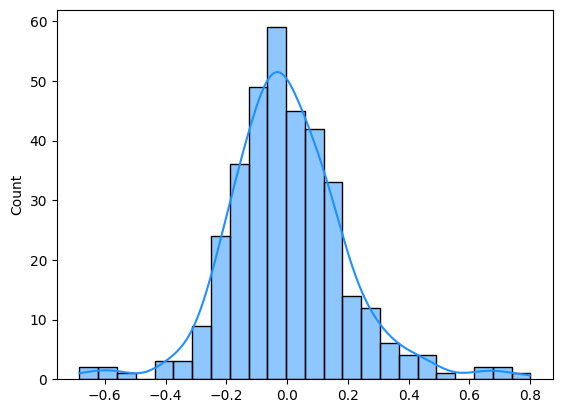

In [50]:
# Plot histogram of residuals
sns.histplot(residuals, kde = True, color="dodgerblue")

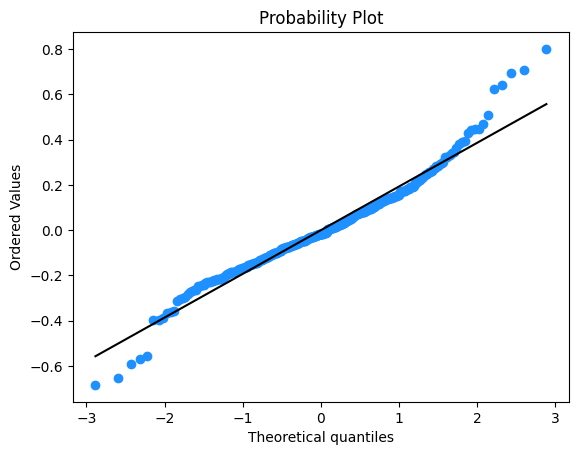

In [51]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

## Generate the probability plot
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(residuals, dist="norm", plot=ax)

# Customize the colors
for line in ax.get_lines():
    line.set_color('black')  # Change the color of the points and the line
    line.set_markerfacecolor('dodgerblue')  # Change the color of the points
    line.set_markeredgecolor('dodgerblue')  # Change the color of the points

plt.show()

**Observations**

From the above plots, the residuals seem to follow a normal distribution and the QQ plot seems to be a straight line which again indicates a normal distribution. Hence, the corresponding assumption is satisfied. Now, we will check the model performance on the train and test datasets.

## Final Model

In [52]:
# In-sample Prediction
y_pred_train = model2.predict(X_train)
y_observed_train = y_train

# Prediction on test data
y_pred_test = model2.predict(X_test)
y_observed_test = y_test

## Calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mse_train**0.5
mae_train = mean_absolute_error(y_train, y_pred_train)
mape_train = np.mean(np.abs(y_train - y_pred_train) / y_train) * 100
r2_train = r2_score(y_train, y_pred_train)
adj_r2_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test**0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_test = np.mean(np.abs(y_test - y_pred_test) / y_test) * 100
r2_test = r2_score(y_test, y_pred_test)
adj_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("MSE:", f"training {mse_train:.3f}, test {mse_test:.3f}")
print("RMSE:", f"training {rmse_train:.3f}, test {rmse_test:.3f}")
print("MAE", f"training {mae_train:.3f}, test {mae_test:.3f}")
print("MAPE:",  f"training {mape_train:.3f}, test {mape_test:.3f}")
print("R-squared:", f"training {r2_train:.3f}, test {r2_test:.3f}")
print("Adjusted R-squared:", f"training {adj_r2_train:.3f}, test {adj_r2_test:.3f}")

MSE: training 0.038, test 0.039
RMSE: training 0.196, test 0.198
MAE training 0.144, test 0.151
MAPE: training 4.982, test 5.258
R-squared: training 0.767, test 0.772
Adjusted R-squared: training 0.761, test 0.758


**Observations**

The results show that the model is performing consistently well on both the training and test data:

* RMSE (Root Mean Squared Error): The training error is 0.196 and test error is 0.198, which are very close, indicating that the model is not overfitting or underfitting.

* MAE (Mean Absolute Error): The training error is 0.144 and test error is 0.151, also quite similar, suggesting stable performance across both datasets.

* MAPE (Mean Absolute Percentage Error): The training error is 4.98% and test error is 5.26%, showing that on average, the model's predictions are off by ~ 5% from the actual values in both cases.

* R-squared: The model explains 76.7% of the variance in training data and 77.2% in test data, meaning the model captures most of the target's variability.

* Adjusted R-squared: The values are 0.761 for training and 0.758 for test, indicating a minimal difference between the two, showing good generalization.

Overall, the model performs similarly on both training and test sets, which suggests it generalizes well and is reliable. This also indicates that the model effectively predicts the target variable (~76%), capturing a significant portion of its variance while errors within reasonable limits.




### **Applying cross validation to improve the model and evaluate it using different evaluation metrics**

In [53]:
# Import the required function
from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


**Observations**

RSquared (73%) is similar to the previous Rsquared values measured for the training data (~76%). However, the +/- 0.232 indicates that the R-squared values vary quite a bit across different folds of the cross-validation, showing some inconsistency in model performance across different subsets of the data.

The MSE is small (0.041), similar to previous MSE values measured for the training data (0.038). Though the error is relatively low, but the variability suggests that the model’s accuracy can fluctuate depending on the subset of data used.

## **Model coefficients and final equations for Linear Regression**

In [54]:
coef = model2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,4.649386
1,CRIM,-0.012500
2,CHAS,0.119773
3,NOX,-1.056225
4,RM,0.058907
5,DIS,-0.044069
6,RAD,0.007848
7,PTRATIO,-0.048504
8,LSTAT,-0.029277


In [55]:
# Write the equation of the model
Equation = "log(Housing Price)="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log(Housing Price)=	( 4.649385823266634 ) *  const + ( -0.012500455079103785 ) *  CRIM + ( 0.11977319077019677 ) *  CHAS + ( -1.056225351668325 ) *  NOX + ( 0.05890657510928028 ) *  RM + ( -0.04406889079940611 ) *  DIS + ( 0.007848474606243312 ) *  RAD + ( -0.048503620794998564 ) *  PTRATIO + ( -0.029277040479796717 ) *  LSTAT + 

## Actionable Insights and Recommendations

### **Conclusions**

This forecasting linear regression model can be used to predict housing prices in Boston. With an R-squared value of approximately 0.76, the model accounts for about 76% of the variation in the data. The model also has a small mean squared error (MSE) of around 0.048, indicating a relatively low level of prediction error. The top features that most significantly influence housing price predictions are:

* NOX: Nitric Oxide concentration (parts per 10 million) - higher levels of nitric oxide are associated with lower housing prices (since negative coefficient). The value -1.056225 suggests a substantial impact. Note that NOX was strongly correlated with INDUS and AGE, probably that is why those features were removed from the model.

 As mentioned earlier, NOX is likely acting as a proxy for older, more industrial areas. These areas might have lower housing prices due to factors like pollution and industrial activity, which can negatively affect the desirability and value of homes.


 * CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)- the coefficient for CHAS shows that houses near the Charles River tend to have higher prices.

 Proximity to the Charles River likely makes properties more desirable due to scenic views, recreational opportunities, and overall aesthetic appeal.

 * RM: The average number of rooms per dwelling - the coefficient for RM shows that houses with more rooms tend to have higher prices, highlighting the importance of room count in determining housing value.

 More rooms generally make a house more desirable, as it can accommodate more people or provide more space for various activities. This desirability is reflected in higher housing prices.


 * PTRATIO: pupil-teacher ratio by town - the negative value of the coefficient -0.048504 suggests that an increase in the pupil-teacher ratio is associated with a decrease in housing prices.

 A higher pupil-teacher ratio often indicates larger class sizes in a school, which can be perceived as a lower quality of education. This can thus make a town less attractive to potential homebuyers, leading to lower housing prices.

 * DIS: weighted distances to five Boston employment centers - the negative value of the coefficient -0.044069 suggests that an increase in the distance to employment centers is associated with a decrease in housing prices.

  Proximity to employment centers is a desirable feature for many homebuyers, as it reduces commuting time and transportation costs. Homes closer to these centers are often more valuable.


  * RAD: index of accessibility to radial highways - accessibility to radial highways (RAD) has a small but positive impact on home values.

  RAD has a positive impact on home values because it improves connectivity and reduces commuting time, making the location more desirable.

  * LSTAT: % lower status of the population - a higher percentage of lower-status population (LSTAT) correlates with lower home values.

  A higher percentage of lower-status population correlates with lower home values as it may indicate socio-economic challenges in the area, which can affect the overall desirability and perceived quality of the neighborhood.

  * CRIM: per capita crime rate by town - a higher crime rate (CRIM) is negatively correlated with home values.

  A higher crime rate is negatively correlated with home values because safety concerns make the area less attractive to potential buyers, leading to lower demand and reduced property prices.










### **Recommendations**

**Real Estate Investment:** Focus on developing properties in low-crime areas near the Charles River or other natural amenities. Avoid polluted areas (NOX), and emphasize adding value through renovations (increasing the number of rooms) and being close to employment centers.

**Service Industries:** Businesses that provide educational services, luxury goods, or family-oriented products should target neighborhoods with good school systems (low PTRATIO) and affluent populations (low LSTAT).

**Environmental and Infrastructure Solutions:** Investing in eco-friendly infrastructure in polluted areas could lead to value appreciation over time, while businesses that improve accessibility to highways or reduce travel time to employment centers can benefit from increased demand.

In summary, businesses should prioritize areas with good environmental conditions, better school systems, proximity to employment hubs, and lower crime rates for maximum success.

## **Regularization**

Regularization is a key method in machine learning used to prevent overfitting by adding a penalty to the model. Overfitting occurs when a model performs well on training data but poorly on test data due to capturing noise. Regularization helps by shrinking the magnitude of feature coefficients without eliminating any features, improving generalization.

It works by introducing a complexity penalty into the model, reducing the impact of features with large coefficients. The two main types of regularization are **Ridge Regression** and **Lasso Regression**, each applying **different penalties to manage feature significance**.

In [56]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

### **Ridge Regression**

Ridge regression is a type of linear regression that adds a small bias to improve long-term predictions. It is an 𝐿2 regularization technique used to reduce model complexity by adding a penalty term to the cost function.

The model adjusts parameters by minimizing the sum of squared residuals plus a penalty proportional to the square of the feature coefficients. The penalty is controlled by a parameter, alpha (𝛼). As 𝛼 approaches zero, Ridge regression behaves like standard linear regression.

Ridge regression is particularly useful when independent variables are highly collinear or when there are more features than samples.

**Ridge Regression with default parameters**

In [57]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

ridge_model = Ridge() #creating Ridge Regression model
ridge_model.fit(X_train, y_train) # Fitting the data into the model

ridge_reg = model_performance_regression(ridge_model, X_test, y_test) #getting performance metrics on test data
print(ridge_reg)

       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.195568  0.148421   0.778141         0.76408  5.156727


**Observations**

he performance metrics are showing almost similar results as compared to the Least Squares method.

**Ridge Regression with optimized ⍺**

In [58]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV


folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}
model = Ridge()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [59]:
model_cv.best_params_

{'alpha': 0.01}

In [60]:
ridge_model_tuned = Ridge(alpha=0.01) ##creating Tuned Ridge Regression model using optimised alpha value
ridge_model_tuned.fit(X_train, y_train) # Fitting the data into the tuned model

Ridge(alpha=0.01)

In [61]:
ridge_reg_tuned = model_performance_regression(ridge_model_tuned, X_test, y_test) #getting performance metrics on test data
ridge_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.197973,0.151199,0.772652,0.758242,5.25514


**Observations**

* After applying the Grid SearchCV, the optimized value of alpha results out to be 0.01.
* It can be observed that after tuning the parameters of Ridge Regression, the performance parameters does not change significantly, implying that Ridge Regression does not help significantly in improving the model.

### **Lasso regularization**

Lasso regression, short for Least Absolute Shrinkage and Selection Operator, is a regularization technique used to reduce model complexity. Unlike Ridge regression, Lasso uses the absolute value of the weights in the penalty term (𝐿1 regularization), which allows it to shrink some coefficients to zero, effectively selecting features.

Lasso minimizes the sum of squared residuals plus a penalty proportional to the absolute value of the feature coefficients, controlled by a parameter (𝛼). This feature makes Lasso useful for feature selection, as it can eliminate irrelevant variables from the model.

**Lasso Regression with default parameters**

In [62]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [63]:
lasso_reg = model_performance_regression(lasso_model, X_test, y_test)
lasso_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.287188,0.207473,0.521576,0.491254,7.118113


**Observations**

* After fitting the data into Lasso Regression Model with default value of alpha (=1), the performance metrics are showing poor results as compared to Least Squares method and Ridge Regression.

* We can tune the alpha to get the optimized value similar to Ridge Regression using Grid SearchCV.

**Lasso Regression with optimized ⍺**

In [64]:
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}
model = Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [65]:
model_cv.best_params_

{'alpha': 0.001}

In [66]:
lasso_model_tuned = Lasso(alpha=0.001)
lasso_model_tuned.fit(X_train, y_train)

Lasso(alpha=0.001)

In [67]:
lasso_reg_tuned = model_performance_regression(lasso_model_tuned, X_test, y_test)
print(lasso_reg_tuned)

       RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  0.196715  0.14966   0.775532        0.761305  5.199207


**Observation**

* After applying the Grid SearchCV, the optimized value of alpha results out to be 0.001.
* The performance metrics are showing similar results as compared to Least Squares method and Ridge Regression, implying that after adding the penalty, the model does not improve significantly.

### **Elastic Net regression**

Elastic Net is a regularized regression model that combines both 𝐿1 (Lasso) and 𝐿2 (Ridge) penalties, offering more flexible regularization. It first applies Ridge regression to determine coefficients and then uses Lasso to shrink them, balancing between feature selection and smoothing.

Elastic Net uses two parameters, 𝛼1 for 𝐿1 (Lasso) and 𝛼2 for 𝐿2 (Ridge). Alternatively, one can use one 𝛼 and an 𝐿1-ratio to control the mix between the penalties. For example, if 𝛼=1 and the 𝐿1-ratio=0.3, 30% is the 𝐿1 penalty and 70% is the 𝐿2 penalty.

Elastic Net minimizes the Mean Squared Error (MSE) with a combined penalty based on 𝐿1 and 𝐿2 terms.

In [68]:
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)

ElasticNet()

In [69]:
elasticnet_reg = model_performance_regression(elasticnet_model, X_test, y_test)
elasticnet_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.253905,0.186263,0.626042,0.60234,6.308978


**Observations**

After fitting the data into Elastic Net Model with default value of alpha (=1) and l1_ratio, the performance metrics are showing poor results as compared to Least Squares method and Ridge Regression.

We can tune the alpha to get the optimized value similar to Ridge Regression using Grid SearchCV.


### **Elastic Net Regression with optimized $\alpha$ and $L_1-ratio$**

In [70]:
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]}
model = ElasticNet()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
                         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]},
             return_train_score=True, scoring='r2')

In [71]:
model_cv.best_params_

{'alpha': 0.001, 'l1_ratio': 0.001}

In [72]:
elasticnet_model_tuned = ElasticNet(alpha=0.001, l1_ratio=0.001)
elasticnet_model_tuned.fit(X_train, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.001)

In [73]:
elasticnet_reg_tuned = model_performance_regression(elasticnet_model_tuned, X_test, y_test)
print(elasticnet_reg_tuned)

       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.196394  0.149523   0.776264        0.762084  5.197382


In [74]:
linear_reg_test = model_performance_regression(model2, X_test, y_test)
linear_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.198045,0.151284,0.772486,0.758066,5.257965


**Observations**

After applying the Grid SearchCV, the optimized value of alpha results out to be 0.001, and l1_ratio = 0.001.

The performance metrics are showing almost similar results as compared to Least Squares method, Ridge Regression and Lasso Regression, implying that after tuning the Elastic Net, the model does not improve significantly.

In [75]:
models= pd.concat([linear_reg_test,ridge_reg,ridge_reg_tuned,lasso_reg,lasso_reg_tuned,elasticnet_reg,
                   elasticnet_reg_tuned], axis=0) #combining all models into a single dataframe
models['Models'] = ['Least Squares', 'Ridge Regression', 'Ridge Regression Tuned', 'Lasso Regression',
                                      'Lasso Regression Tuned', 'Elastic Net Regression',
                    'Elastic Net Regression Tuned'] #adding names of the models as a column to the dataframe
models = models.iloc[:,[5, 0,1,2,3,4]] #ordering names of the models as the first column
models

,Models,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,Least Squares,0.198045,0.151284,0.772486,0.758066,5.257965
0,Ridge Regression,0.195568,0.148421,0.778141,0.764080,5.156727
0,Ridge Regression Tuned,0.197973,0.151199,0.772652,0.758242,5.255140
0,Lasso Regression,0.287188,0.207473,0.521576,0.491254,7.118113
0,Lasso Regression Tuned,0.196715,0.149660,0.775532,0.761305,5.199207
0,Elastic Net Regression,0.253905,0.186263,0.626042,0.602340,6.308978
0,Elastic Net Regression Tuned,0.196394,0.149523,0.776264,0.762084,5.197382


**Observations**

* Ridge and Elastic Net (Tuned) models perform the best, with slightly lower errors and higher R-squared than OLS, overall the performances of all the models are very similar.

* Lasso or Elastic Net (without tuning) underperforms due to its aggressive feature selection, but tuning improves it significantly.

## **Model coefficients and final equations for Ridge Regression**

In [76]:
from sklearn.linear_model import Ridge

# Getting the coefficients from the Ridge model
coef_ridge_tuned = ridge_model_tuned.coef_
intercept_ridge_tuned = ridge_model_tuned.intercept_

# Creating a DataFrame to display the features and their coefficients
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefs': coef_ridge_tuned})

# Adding the intercept if needed
coef_df = pd.concat([pd.DataFrame({'Feature': ['Intercept'], 'Coefs': [intercept_ridge_tuned]}), coef_df], ignore_index=True)

# Display the DataFrame
print(coef_df)


     Feature     Coefs
0  Intercept  4.642965
1      const  0.000000
2       CRIM -0.012492
3       CHAS  0.119639
4        NOX -1.048684
5         RM  0.059003
6        DIS -0.043845
7        RAD  0.007810
8    PTRATIO -0.048425
9      LSTAT -0.029302


In [77]:
Equation = "log(Housing Price)="
print(Equation, end='\t')

# Iterate over features and coefficients
for i in range(len(coef_df)):
    feature_name = coef_df.loc[i, 'Feature']  # Access using .loc for clarity
    coefficient = coef_df.loc[i, 'Coefs']
    print('(', coefficient, ') * ', feature_name, '+', end=' ')

# Remove the trailing space and add newline
print('\b')  # Remove the last space

log(Housing Price)=	( 4.642964773223901 ) *  Intercept + ( 0.0 ) *  const + ( -0.01249155517912448 ) *  CRIM + ( 0.11963910763732363 ) *  CHAS + ( -1.0486835032981707 ) *  NOX + ( 0.05900317364302936 ) *  RM + ( -0.04384525580502145 ) *  DIS + ( 0.0078101722725279765 ) *  RAD + ( -0.048425070779091806 ) *  PTRATIO + ( -0.02930230607527466 ) *  LSTAT + 


## **Model coefficients and final equations for Elastic Net Regression**

In [78]:
from sklearn.linear_model import ElasticNet

# Getting the coefficients from the Ridge model
coef_elasticnet_tuned = elasticnet_model_tuned.coef_
intercept_elasticnet_tuned = elasticnet_model_tuned.intercept_

# Creating a DataFrame to display the features and their coefficients
coef_en_df = pd.DataFrame({'Feature': X_train.columns, 'Coefs': coef_elasticnet_tuned})

# Adding the intercept if needed
coef_en_df = pd.concat([pd.DataFrame({'Feature': ['Intercept'], 'Coefs': [intercept_elasticnet_tuned]}), coef_en_df], ignore_index=True)

# Display the DataFrame
print(coef_en_df)

     Feature     Coefs
0  Intercept  4.467258
1      const  0.000000
2       CRIM -0.012248
3       CHAS  0.115695
4        NOX -0.841814
5         RM  0.061612
6        DIS -0.037716
7        RAD  0.006761
8    PTRATIO -0.046275
9      LSTAT -0.029999


In [79]:
Equation = "log(Housing Price)="
print(Equation, end='\t')

# Iterate over features and coefficients
for i in range(len(coef_en_df)):
    feature_name = coef_en_df.loc[i, 'Feature']  # Access using .loc for clarity
    coefficient = coef_en_df.loc[i, 'Coefs']
    print('(', coefficient, ') * ', feature_name, '+', end=' ')

# Remove the trailing space and add newline
print('\b')  # Remove the last space

log(Housing Price)=	( 4.467258353155227 ) *  Intercept + ( 0.0 ) *  const + ( -0.012248364635636859 ) *  CRIM + ( 0.11569462748564162 ) *  CHAS + ( -0.8418139071087132 ) *  NOX + ( 0.061611644040095975 ) *  RM + ( -0.037715896402328204 ) *  DIS + ( 0.006760610514760755 ) *  RAD + ( -0.04627515827419803 ) *  PTRATIO + ( -0.029998557674939214 ) *  LSTAT + 


___